
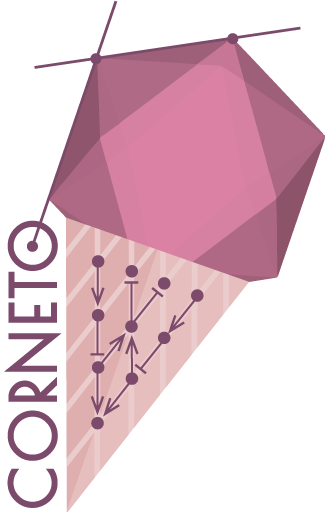

In [1]:
import corneto as cn

cn.info()

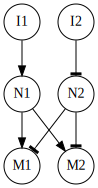

In [2]:
G = cn.Graph.from_sif_tuples(
    [
        ("I1", 1, "N1"),  # I1 activates N1
        ("N1", 1, "M1"),  # N1 activates M1
        ("N1", 1, "M2"),  # N1 activaes M2
        ("I2", -1, "N2"),  # I2 inhibits N2
        ("N2", -1, "M2"),  # N2 inhibits M2
        ("N2", -1, "M1"),  # N2 inhibits M1
    ]
)
G.plot()

In [3]:
from corneto.methods import runVanillaCarnival

# These are the measurements (e.g. TF activity from Decoupler).
# Positive values correspond to up-regulation and negative values
# with down-regulation. The bigger the absolute value is,
# the bigger the importance is
measurements = {"M1": 1, "M2": 1}

# Perturbations are the upstream nodes were the signal originates on,
# for example, ligands or receptors.
perturbations = {"I1": 1, "I2": 1}

# We run the `standard` carnival problem. This interface is similar
# to the old R function https://saezlab.github.io/CARNIVAL/reference/runVanillaCarnival.html
P, Gf = runVanillaCarnival(perturbations, measurements, G, betaWeight=0.1)

(CORNETO) May 12 09:45:18 AM - INFO    : 2/2 inputs mapped to the graph


(CORNETO) May 12 09:45:18 AM - INFO    : 2/2 outputs mapped to the graph


(CORNETO) May 12 09:45:18 AM - INFO    : Pruning the graph with size: V x E = (6, 6)...


(CORNETO) May 12 09:45:18 AM - INFO    : Finished. Final size: V x E = (6, 6).


(CORNETO) May 12 09:45:18 AM - INFO    : 2/2 inputs after pruning.


(CORNETO) May 12 09:45:18 AM - INFO    : 2/2 outputs after pruning.


(CORNETO) May 12 09:45:18 AM - INFO    : Converting into a flow graph...


(CORNETO) May 12 09:45:18 AM - INFO    : Creating a network flow problem...


(CORNETO) May 12 09:45:18 AM - INFO    : Preprocess completed.


                                     CVXPY                                     
                                     v1.5.1                                    
(CVXPY) May 12 09:45:18 AM: Your problem has 86 variables, 197 constraints, and 0 parameters.


(CVXPY) May 12 09:45:18 AM: It is compliant with the following grammars: DCP, DQCP


(CVXPY) May 12 09:45:18 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)


(CVXPY) May 12 09:45:18 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.


(CVXPY) May 12 09:45:18 AM: Your problem is compiled with the CPP canonicalization backend.


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 12 09:45:18 AM: Compiling problem (target solver=SCIP).


(CVXPY) May 12 09:45:18 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCIP


(CVXPY) May 12 09:45:18 AM: Applying reduction Dcp2Cone


(CVXPY) May 12 09:45:18 AM: Applying reduction CvxAttr2Constr


(CVXPY) May 12 09:45:18 AM: Applying reduction ConeMatrixStuffing


(CVXPY) May 12 09:45:18 AM: Applying reduction SCIP


(CVXPY) May 12 09:45:18 AM: Finished problem compilation (took 3.057e-02 seconds).


-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 12 09:45:18 AM: Invoking solver SCIP  to obtain a solution.


presolving:
(round 1, fast)       36 del vars, 95 del conss, 0 add conss, 48 chg bounds, 1 chg sides, 23 chg coeffs, 0 upgd conss, 0 impls, 28 clqs
(round 2, fast)       54 del vars, 129 del conss, 0 add conss, 52 chg bounds, 9 chg sides, 31 chg coeffs, 0 upgd conss, 0 impls, 20 clqs
(round 3, fast)       63 del vars, 145 del conss, 0 add conss, 52 chg bounds, 11 chg sides, 33 chg coeffs, 0 upgd conss, 0 impls, 18 clqs
(round 4, fast)       65 del vars, 147 del conss, 0 add conss, 52 chg bounds, 15 chg sides, 37 chg coeffs, 0 upgd conss, 0 impls, 18 clqs
(round 5, fast)       67 del vars, 151 del conss, 0 add conss, 52 chg bounds, 15 chg sides, 37 chg coeffs, 0 upgd conss, 0 impls, 18 clqs
(round 6, exhaustive) 67 del vars, 151 del conss, 0 add conss, 52 chg bounds, 15 chg sides, 37 chg coeffs, 40 upgd conss, 0 impls, 18 clqs
   (0.0s) probing cycle finished: starting next cycle
(round 7, exhaustive) 69 del vars, 151 del conss, 0 add conss, 52 chg bounds, 15 chg sides, 37 chg coeffs, 4

(CVXPY) May 12 09:45:18 AM: Optimal value: 7.000e-01


(CVXPY) May 12 09:45:18 AM: Compilation took 3.057e-02 seconds


(CVXPY) May 12 09:45:18 AM: Solver (including time spent in interface) took 2.116e-02 seconds


(CORNETO) May 12 09:45:18 AM - INFO    : Finished in 0.07 s.


In [4]:
# We can check the error. Values larger than 0 indicate that
# some TF or measurement was not selected.
P.objectives[0].value

array([0.])

In [5]:
# Variables that are defined by CARNIVAL
P.expr

{'_flow': Variable((14,), _flow),
 '_flow_ipos': Variable((14,), _flow_ipos, boolean=True),
 'species_inhibited_c0': Variable((10,), species_inhibited_c0, boolean=True),
 'reaction_sends_inhibition_c0': Variable((14,), reaction_sends_inhibition_c0, boolean=True),
 'species_activated_c0': Variable((10,), species_activated_c0, boolean=True),
 'reaction_sends_activation_c0': Variable((14,), reaction_sends_activation_c0, boolean=True),
 'dag_layer_position_c0': Variable((10,), dag_layer_position_c0),
 'flow': Variable((14,), _flow),
 'edge_values_c0': Expression(AFFINE, UNKNOWN, (14,)),
 'vertex_values_c0': Expression(AFFINE, UNKNOWN, (10,))}

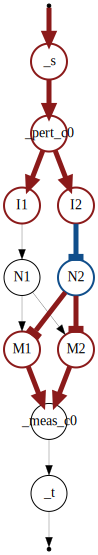

In [6]:
Gf.plot_values(vertex_values=P.expr.vertex_values_c0, edge_values=P.expr.edge_values_c0)

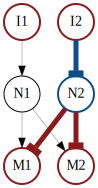

In [7]:
G.plot(
    custom_edge_attr=cn.pl.edge_style(P, edge_var="edge_values_c0"),
    custom_vertex_attr=cn.pl.vertex_style(P, Gf, vertex_var="vertex_values_c0"),
)

In [8]:
import pandas as pd

from corneto.methods.carnival import get_result, get_selected_edges

V, E = get_result(P, Gf)
pd.DataFrame(V)

,V,value
0,M2,1.0
1,I2,1.0
2,I1,1.0
3,N1,0.0
4,M1,1.0
5,N2,-1.0
6,_s,1.0
7,_pert_c0,1.0
8,_meas_c0,0.0
9,_t,0.0


In [9]:
pd.DataFrame(E)

,E,value
0,"((I1), (N1))",0.0
1,"((N1), (M1))",0.0
2,"((N1), (M2))",0.0
3,"((I2), (N2))",-1.0
4,"((N2), (M2))",1.0
5,"((N2), (M1))",1.0
6,"((_s), (_pert_c0))",1.0
7,"((_pert_c0), (I1))",1.0
8,"((_pert_c0), (I2))",1.0
9,"((M1), (_meas_c0))",1.0


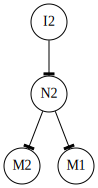

In [10]:
G_sol = Gf.edge_subgraph(get_selected_edges(P, Gf))
G_sol.plot()

In [11]:
from corneto.methods import fast_carnival
from corneto.methods.carnival import read_dataset

G, dict_data = read_dataset("carnival_example.zip")
G.shape

(4931, 13157)

In [12]:
dict_data

{'EGFR': ('P', -1),
 'AEBP1': ('M', -1),
 'CREB3': ('M', 1),
 'EGR3': ('M', -1),
 'ELK1': ('M', -1),
 'FOSL2': ('M', -1),
 'FOXA3': ('M', 1),
 'FOXE1': ('M', 1),
 'HIPK2': ('M', 1),
 'HOXA2': ('M', 1),
 'HOXB7': ('M', -1),
 'HOXD3': ('M', 1),
 'KDM5C': ('M', -1),
 'KDM5D': ('M', 1),
 'KLF2': ('M', -1),
 'NEUROD1': ('M', -1),
 'NFATC4': ('M', -1),
 'NFYB': ('M', -1),
 'NHLH2': ('M', 1),
 'PLAGL2': ('M', -1),
 'RUNX2': ('M', -1),
 'SIRT1': ('M', 1),
 'SUPT20H': ('M', 1),
 'TBX20': ('M', -1),
 'TET1': ('M', 1),
 'ZBTB4': ('M', -1)}

In [13]:
c_inputs = {k: v[1] for k, v in dict_data.items() if v[0] == "P"}
c_outputs = {k: v[1] for k, v in dict_data.items() if v[0] == "M"}

In [14]:
Gc, selected_edges, paths, stats, errors = fast_carnival(
    G, c_inputs, c_outputs, restricted_search=False
)

1/1 inputs mapped to the graph
16/25 outputs mapped to the graph
Pruning the graph with size: V x E = (4931, 13157)...


Finished. Final size: V x E = (1182, 5789).
ELK1 (L3), NEUROD1 (L4), SIRT1 (L3), NFYB (L3), HOXB7 (L4), RUNX2 (L3), AEBP1 (L3), HIPK2 (L3), NFATC4 (L3), ZBTB4 (L4)
L1  :      1 iters, 0.00 s.
L2  :     41 iters, 0.00 s.
 > -EGFR -> +CRK -> +MAPK8 -> +SIRT1
 > -EGFR -> +CRK -> +MAPK8 -> -NFATC4
 > -EGFR -> -PTPN1 -> +ABL1 -> +HIPK2
 > -EGFR -> -PRKDC -> -MAPK8 -> -ELK1
   ! conflict: -EGFR/-MAPK8 != -EGFR/+MAPK8
 > -EGFR -> -MAP2K1 -> -MAPK1 -> -ELK1
 > -EGFR -> -MAP2K1 -> -MAPK1 -> -AEBP1
 > -EGFR -> -MAP2K1 -> -MAPK3 -> -RUNX2
L3  :    316 iters, 0.01 s.
 > -EGFR -> -STAT1 -> +CREBBP -> ... -> -NFYB
 > -EGFR -> -PIK3R1 -> -RAC1 -> ... -> -NEUROD1
 > -EGFR -> -PTPN1 -> +ABL1 -> ... -> -ZBTB4
 > -EGFR -> -ERBB2 -> +CDK1 -> ... -> -HOXB7
Finished (0.18 s)
 > Number of selected edges: 26
 > Total iterations: 2287
 > Detected loops: 255
 > Conflicts: 1
Total error: 15
Number of selected edges: 26


In [15]:
node_values = {}
for p in paths:
    for k, v in p[1].items():
        node_values[k] = v[1]

G_sol = Gc.edge_subgraph(selected_edges)

V = G_sol.V
vertex_values = [node_values.get(v, 0) for v in V]

In [16]:
errors

{'AEBP1': 0,
 'CREB3': 1,
 'EGR3': 1,
 'ELK1': 0,
 'FOSL2': 1,
 'FOXA3': 1,
 'FOXE1': 1,
 'HIPK2': 0,
 'HOXA2': 1,
 'HOXB7': 0,
 'HOXD3': 1,
 'KDM5C': 1,
 'KDM5D': 1,
 'KLF2': 1,
 'NEUROD1': 0,
 'NFATC4': 0,
 'NFYB': 0,
 'NHLH2': 1,
 'PLAGL2': 1,
 'RUNX2': 0,
 'SIRT1': 0,
 'SUPT20H': 1,
 'TBX20': 1,
 'TET1': 1,
 'ZBTB4': 0}

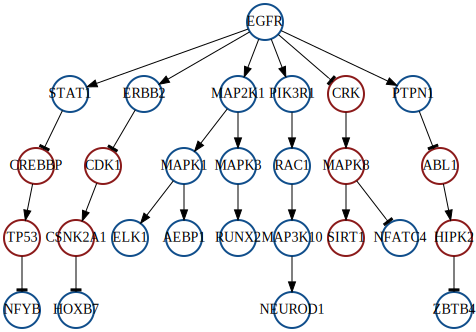

In [17]:
G_sol.plot_values(vertex_values=vertex_values)